In [1]:
import os
CWD = os.getcwd()

In [112]:
import pandas as pd
df = pd.read_csv(CWD[:-10] + "/data/processed/train/oidium-train.csv", skiprows = [0], encoding='latin-1')

In [113]:
df.tail()

,Datum,Tmin,Tavg,Tmax,Niederschlag,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,BlattflÃÂ¤che,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth
2542,26.12.2020,-2.05,0.460277777778,4.66,0,0,0,0,0,0,0,0,26.12
2543,27.12.2020,-0.73,4.308888888889,8.76,0.8,0,0,0,0,0,0,0,27.12
2544,28.12.2020,3.37,5.388055555556,8.18,9.9,0,0,0,0,0,0,0,28.12
2545,29.12.2020,4.23,5.18375,6.48,0.7,0,0,0,0,0,0,0,29.12
2546,30.12.2020,2.76,3.754930555556,5.26,0,0,0,0,0,0,0,0,30.12


In [114]:
df['Datum']

0       01.01.2013
1       02.01.2013
2       03.01.2013
3       04.01.2013
4       05.01.2013
           ...    
2542    26.12.2020
2543    27.12.2020
2544    28.12.2020
2545    29.12.2020
2546    30.12.2020
Name: Datum, Length: 2547, dtype: object

In [116]:
drop = []
for enum, i in enumerate(df['Datum']):
    if 'Datum' in i:
        drop.append(enum - 1)
        drop.append(enum)
print(drop)

[362, 363, 726, 727, 1090, 1091, 1454, 1455, 1818, 1819, 2182, 2183]


In [118]:
df.drop(drop,
       axis=0,
       inplace=True)

KeyError: '[ 362  363  726  727 1090 1091 1454 1455 1818 1819 2182 2183] not found in axis'

In [128]:
df.drop('DayMonth',
       axis=1,
       inplace=True)

In [122]:
tmp = pd.to_datetime(df['Datum'])

In [123]:
df['Datum'] = tmp

In [124]:
df = df.set_index("Datum")
df.head()

,Tmin,Tavg,Tmax,Niederschlag,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,BlattflÃÂ¤che,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth
Datum,,,,,,,,,,,,
2013-01-01,1.69,5.4125,7.99,4,0,0,0,0,0,0,0,01.01
2013-02-01,-0.3,3.900555555556,8.34,0.1,0,0,0,4,4,1,11,02.01
2013-03-01,-1.37,3.484166666667,6.81,0,0,0,0,4,4,1,11,03.01
2013-04-01,5.99,7.194791666667,8.33,0,0,0,0,4,4,1,11,04.01
2013-05-01,5.2,6.660277777778,7.69,0.1,0,0,0,4,4,1,11,05.01


In [126]:
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday'] = df.index.weekday

In [130]:
df.head()

,Tmin,Tavg,Tmax,Niederschlag,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,BlattflÃÂ¤che,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,year,month,weekday
Datum,,,,,,,,,,,,,,
2013-01-01,1.69,5.4125,7.99,4,0,0,0,0,0,0,0,2013,1,1
2013-02-01,-0.3,3.900555555556,8.34,0.1,0,0,0,4,4,1,11,2013,2,4
2013-03-01,-1.37,3.484166666667,6.81,0,0,0,0,4,4,1,11,2013,3,4
2013-04-01,5.99,7.194791666667,8.33,0,0,0,0,4,4,1,11,2013,4,0
2013-05-01,5.2,6.660277777778,7.69,0.1,0,0,0,4,4,1,11,2013,5,2


In [133]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [138]:
df.loc[:,'PreviousIndex'] = df.loc[:,'OidiumIndex'].astype(float).shift()
df.loc[:,'IndexDelta'] = df.loc[:,'PreviousIndex'].diff()

In [140]:
df.tail()

,Tmin,Tavg,Tmax,Niederschlag,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,BlattflÃÂ¤che,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,year,month,weekday,PreviousIndex,IndexDelta
Datum,,,,,,,,,,,,,,,,
2020-12-26,-2.05,0.460277777778,4.66,0,0,0,0,0,0,0,0,2020,12,5,0.0,0.0
2020-12-27,-0.73,4.308888888889,8.76,0.8,0,0,0,0,0,0,0,2020,12,6,0.0,0.0
2020-12-28,3.37,5.388055555556,8.18,9.9,0,0,0,0,0,0,0,2020,12,0,0.0,0.0
2020-12-29,4.23,5.18375,6.48,0.7,0,0,0,0,0,0,0,2020,12,1,0.0,0.0
2020-12-30,2.76,3.754930555556,5.26,0,0,0,0,0,0,0,0,2020,12,2,0.0,0.0


In [142]:
X_train = df.drop(['OidiumIndex'], axis = 1)
y_train = df['OidiumIndex']

In [145]:
y_train

Datum
2013-01-01    0
2013-02-01    0
2013-03-01    0
2013-04-01    0
2013-05-01    0
             ..
2020-12-26    0
2020-12-27    0
2020-12-28    0
2020-12-29    0
2020-12-30    0
Name: OidiumIndex, Length: 2535, dtype: object

In [146]:
test_df = pd.read_csv(CWD[:-10] + "/data/processed/test/oidium2021.csv", skiprows = [0], encoding='latin-1')

In [147]:
test_df.tail()

,time,Datum,Tmin,Tavg,Tmax,Niederschlag,Feuchte,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,Blattfläche,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth
282,10.10.2021 23:00:00,10.10.2021,2.32,8.001667,14.36,0.0,72.083333,0.0,0.2,0.0,3880.3,0.0,34,89,10.1
283,11.10.2021 23:00:00,11.10.2021,2.52,8.024583,14.32,0.0,72.041667,0.0,0.2,0.0,3880.3,0.0,34,89,11.1
284,12.10.2021 23:00:00,12.10.2021,4.36,8.205833,12.12,0.8,79.125000,0.0,0.2,0.0,3880.3,0.0,34,89,12.1
285,13.10.2021 23:00:00,13.10.2021,3.79,7.701250,12.03,0.9,80.125000,0.0,0.2,0.0,3880.3,0.0,34,89,13.1
286,14.10.2021 23:00:00,14.10.2021,5.09,8.786667,13.77,0.0,79.291667,0.0,0.2,0.0,3880.3,0.0,34,89,14.1


In [153]:
test_df['Datum']

0      01.01.2021
1      02.01.2021
2      03.01.2021
3      04.01.2021
4      05.01.2021
          ...    
282    10.10.2021
283    11.10.2021
284    12.10.2021
285    13.10.2021
286    14.10.2021
Name: Datum, Length: 287, dtype: object

In [149]:
drop = []
for enum, i in enumerate(test_df['Datum']):
    if 'Datum' in i:
        drop.append(enum - 1)
        drop.append(enum)
print(drop)

[]


In [151]:
df.drop(drop,
       axis=0,
       inplace=True)

In [155]:
tmp = pd.to_datetime(test_df['Datum'])

In [156]:
test_df['Datum'] = tmp

In [157]:
test_df = test_df.set_index("Datum")
test_df.head()

,time,Tmin,Tavg,Tmax,Niederschlag,Feuchte,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,Blattfläche,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth
Datum,,,,,,,,,,,,,,
2021-01-01,01.01.2021 23:50:00,1.55,2.577361,4.00,1.7,90.715278,0.0,0.0,0.0,0.0,0.0,0,0,1.01
2021-02-01,02.01.2021 23:50:00,0.88,1.275000,1.99,0.0,91.847222,0.0,0.0,0.0,0.0,0.0,0,0,2.01
2021-03-01,03.01.2021 23:50:00,-0.56,0.207014,0.94,0.5,95.541667,0.0,0.0,0.0,0.0,0.0,0,0,3.01
2021-04-01,04.01.2021 23:50:00,-1.98,0.440694,1.79,0.0,93.972222,0.0,0.0,0.0,0.0,0.0,0,0,4.01
2021-05-01,05.01.2021 23:50:00,-0.29,0.166181,0.66,0.0,91.006944,0.0,0.0,0.0,0.0,0.0,0,0,5.01


In [158]:
test_df['year'] = test_df.index.year
test_df['month'] = test_df.index.month
test_df['weekday'] = test_df.index.weekday

In [159]:
test_df.head()

,time,Tmin,Tavg,Tmax,Niederschlag,Feuchte,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,Blattfläche,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth,year,month,weekday
Datum,,,,,,,,,,,,,,,,,
2021-01-01,01.01.2021 23:50:00,1.55,2.577361,4.00,1.7,90.715278,0.0,0.0,0.0,0.0,0.0,0,0,1.01,2021,1,4
2021-02-01,02.01.2021 23:50:00,0.88,1.275000,1.99,0.0,91.847222,0.0,0.0,0.0,0.0,0.0,0,0,2.01,2021,2,0
2021-03-01,03.01.2021 23:50:00,-0.56,0.207014,0.94,0.5,95.541667,0.0,0.0,0.0,0.0,0.0,0,0,3.01,2021,3,0
2021-04-01,04.01.2021 23:50:00,-1.98,0.440694,1.79,0.0,93.972222,0.0,0.0,0.0,0.0,0.0,0,0,4.01,2021,4,3
2021-05-01,05.01.2021 23:50:00,-0.29,0.166181,0.66,0.0,91.006944,0.0,0.0,0.0,0.0,0.0,0,0,5.01,2021,5,5


In [160]:
test_df.loc[:,'PreviousIndex'] = test_df.loc[:,'OidiumIndex'].astype(float).shift()
test_df.loc[:,'IndexDelta'] = test_df.loc[:,'PreviousIndex'].diff()

In [161]:
test_df.tail()

,time,Tmin,Tavg,Tmax,Niederschlag,Feuchte,OidiumIndex,Stadienspez. Anfaelligkeit,OidiumTageswert,Blattfläche,BlattflaecheImWachstum,Blattanzahl,BBCHStadium,DayMonth,year,month,weekday,PreviousIndex,IndexDelta
Datum,,,,,,,,,,,,,,,,,,,
2021-10-10,10.10.2021 23:00:00,2.32,8.001667,14.36,0.0,72.083333,0.0,0.2,0.0,3880.3,0.0,34,89,10.1,2021,10,6,0.0,0.0
2021-11-10,11.10.2021 23:00:00,2.52,8.024583,14.32,0.0,72.041667,0.0,0.2,0.0,3880.3,0.0,34,89,11.1,2021,11,2,0.0,0.0
2021-12-10,12.10.2021 23:00:00,4.36,8.205833,12.12,0.8,79.125000,0.0,0.2,0.0,3880.3,0.0,34,89,12.1,2021,12,4,0.0,0.0
2021-10-13,13.10.2021 23:00:00,3.79,7.701250,12.03,0.9,80.125000,0.0,0.2,0.0,3880.3,0.0,34,89,13.1,2021,10,2,0.0,0.0
2021-10-14,14.10.2021 23:00:00,5.09,8.786667,13.77,0.0,79.291667,0.0,0.2,0.0,3880.3,0.0,34,89,14.1,2021,10,3,0.0,0.0


In [162]:
X_test = test_df.drop(['OidiumIndex'], axis = 1)
y_test = test_df['OidiumIndex']

In [168]:
y_test

Datum
2021-01-01    0.0
2021-02-01    0.0
2021-03-01    0.0
2021-04-01    0.0
2021-05-01    0.0
             ... 
2021-10-10    0.0
2021-11-10    0.0
2021-12-10    0.0
2021-10-13    0.0
2021-10-14    0.0
Name: OidiumIndex, Length: 287, dtype: float64

In [174]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

/home/jinen/git/pier-11/glomimo/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jinen/git/pier-11/glomimo/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jinen/git/pier-11/glomimo/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py", line 661, in fit
    X, y = self._validate_data(
  File "/home/jinen/git/pier-11/glomimo/venv/lib/python3.9/site-packages/sklearn/base.py", line 572, in _validat

LR: nan (nan)
NN: nan (nan)
KNN: nan (nan)
RF: nan (nan)
SVR: nan (nan)


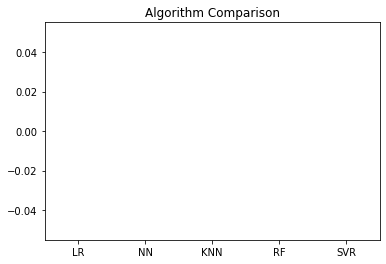

In [175]:
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()